In [44]:
# Importing Required Libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import sklearn
import numpy as np

In [45]:
# Reading data
data = pd.read_csv('/Users/hoosiersaikap251/dataviz/docs/Data.csv')

Taking Features Related to ROI Metric

| Feature Name                    | Description                                                                                 |
|--------------------------------|---------------------------------------------------------------------------------------------|
| business_impact_score          | Estimated business value or impact score (1-10)                                             |
| user_demand_score              | User demand or interest score (1-10 or based on upvotes/surveys)                            |
| customer_satisfaction_impact   | Impact on customer satisfaction or NPS (e.g., score 1-5)                                    |
| time_saved_per_user_minutes    | Estimated time saved per user per week in minutes                                          |
| num_users_impacted             | Number of users expected to be impacted                                                    |
| market_differentiation_score   | Score indicating how much this sets product apart in market (1-5)                          |
| revenue_potential_usd          | Projected revenue increase in USD from this feature                                        |
| cost_savings_usd               | Projected cost savings in USD from this feature                                            |
| scalability_potential_score    | Score indicating how scalable or reusable the idea is (1-5)                                |
| feature_adoption_likelihood    | Likelihood of feature adoption (percentage or 1-5 scale)                                   |


In [46]:

df_ROI = data[['Title','Description','business_impact_score', 'user_demand_score', 'customer_satisfaction_impact', 
               'time_saved_per_user_minutes', 'num_users_impacted', 'market_differentiation_score', 
               'revenue_potential_usd', 'cost_savings_usd', 'scalability_potential_score', 
               'feature_adoption_likelihood']].copy()

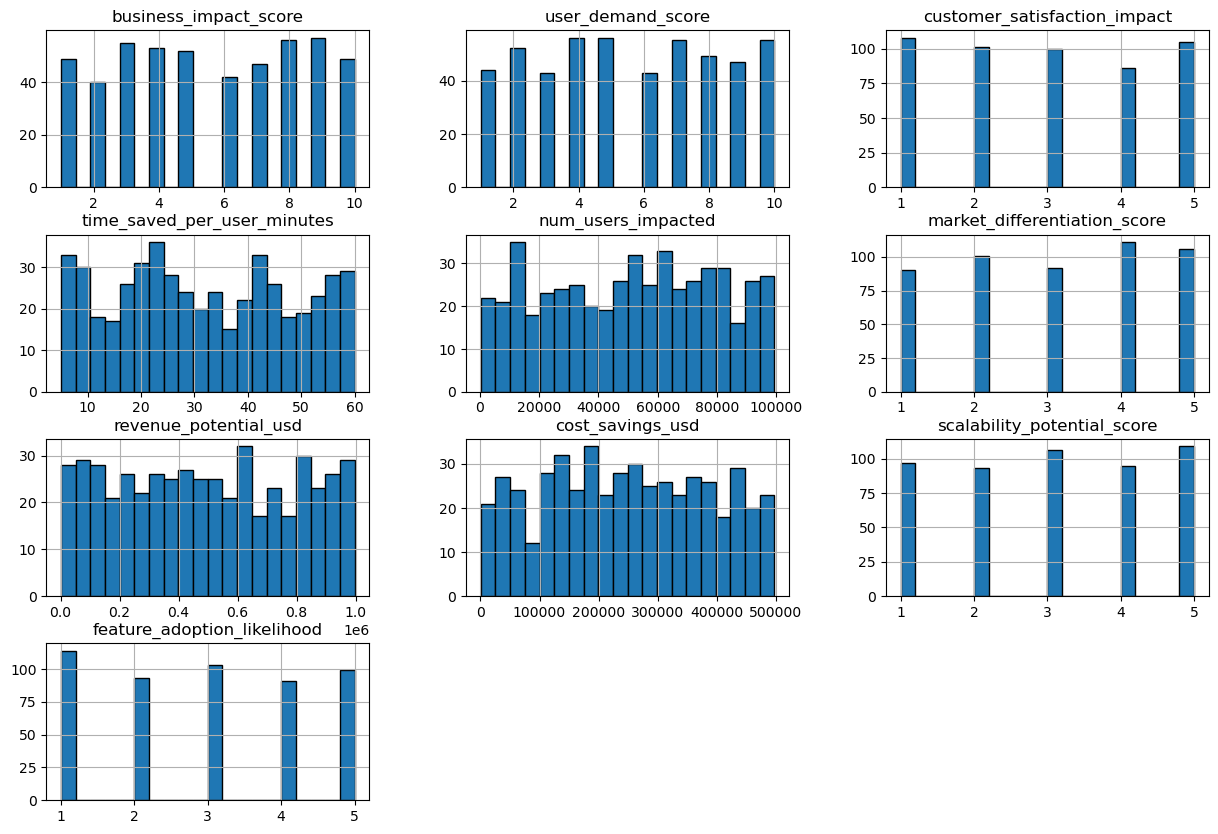

In [47]:
df_ROI.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.show()

Normalizing the Data based on Min-Max Scaling 

In [ ]:
numerical_columns = df_ROI.select_dtypes(include=['int64', 'float64']).columns
scaler = MinMaxScaler(feature_range=(0, 1))
df_ROI_normalized = df_ROI.copy()
df_ROI_normalized[numerical_columns] = scaler.fit_transform(df_ROI[numerical_columns])
df_ROI_normalized.head(5)

Title  \
0      Intelligent Machine Service   
1      Cloud-Based Local Optimizer   
2  Intelligent Establish Optimizer   
3           Cloud-Based Ten System   
4            Automated Six Manager   

                                         Description  business_impact_score  \
0  Intelligent Machine Service aims at enhancing ...               0.555556   
1  Cloud-Based Local Optimizer aims at optimizing...               0.666667   
2  Intelligent Establish Optimizer aims at enhanc...               0.666667   
3  Cloud-Based Ten System aims at enhancing autom...               0.777778   
4  Automated Six Manager aims at improving compli...               0.444444   

   user_demand_score  customer_satisfaction_impact  \
0           0.111111                          0.75   
1           0.777778                          0.50   
2           0.333333                          0.00   
3           0.444444                          1.00   
4           0.000000                          0.75   

   time_saved_per_user_minutes  num_users_impacted  \
0                     0.763636            0.457039   
1                     0.254545            0.707034   
2                     0.690909            0.055478   
3                     0.000000            0.854390   
4                     0.581818            0.838421   

   market_differentiation_score  revenue_potential_usd  cost_savings_usd  \
0                          0.75               0.751514          0.484002   
1                          0.50               0.945640          0.517658   
2                          0.00               0.092971          0.048161   
3                          0.50               0.920779          0.573102   
4                          1.00               0.892064          0.654300   

   scalability_potential_score  feature_adoption_likelihood  
0                         0.50                         0.75  
1                         0.25                         1.00  
2                         0.50                         0.75  
3                         1.00                         0.50  
4                         0.50                         0.50

In [51]:
# Keeping the Target Label Randomly 
df_ROI_normalized['target'] = np.random.rand(len(df_ROI_normalized))

In [52]:
# Train, Val and Test Split For Training Random Forest Model
from sklearn.model_selection import train_test_split

df_train,df_temp = train_test_split(df_ROI_normalized, train_size=300, random_state=42)
df_val, df_test = train_test_split(df_ROI_normalized, test_size=100, random_state=42)

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Training the Model
X = df_train[numerical_columns]
y = df_train['target']


rf_regressor = RandomForestRegressor(n_estimators=100,random_state=42)
rf_regressor.fit(X, y)

# Val Set
X_val = df_val[numerical_columns]
y_val = df_val['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_val, y_pred)
print(f"MSE: {mse}")

MSE: 0.030633387595094735


Feature importance indicates how much each feature contributes to the predictive power of the model.
Higher importance values mean the feature plays a bigger role in the modelâ€™s decisions.
This helps with model interpretability and can guide feature selection or engineering.

In [ ]:
# Get feature importances
feature_importances = rf_regressor.feature_importances_
importances_df = pd.DataFrame({
    'Feature': numerical_columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

                        Feature  Importance
7              cost_savings_usd    0.181917
4            num_users_impacted    0.170888
6         revenue_potential_usd    0.159846
3   time_saved_per_user_minutes    0.123502
0         business_impact_score    0.084090
1             user_demand_score    0.068036
8   scalability_potential_score    0.059022
2  customer_satisfaction_impact    0.057495
9   feature_adoption_likelihood    0.051037
5  market_differentiation_score    0.044167


In [54]:
import altair as alt

# Create a histogram for feature importance
chart = alt.Chart(importances_df).mark_bar().encode(
    x=alt.X('Feature', sort='-y', title='Features'),
    y=alt.Y('Importance', scale=alt.Scale(domain=[0, 1]), title='Importance'),
    tooltip=['Feature', 'Importance']
).properties(
    title='Feature Importance Histogram',
    width=600,
    height=400
)

chart

/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [55]:
feature_weights = pd.Series(feature_importances, index=X.columns)

In [56]:
df_train['roi_target'] = df_train[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [57]:
df_train_sorted = df_train.sort_values(by='roi_target', ascending=False)
df_train_sorted.head(3)

Title  \
309       Smart Among Service   
27   Cloud-Based The Platform   
51   Zero-Touch Compare Agent   

                                           Description  business_impact_score  \
309  Smart Among Service aims at improving complian...               0.888889   
27   Cloud-Based The Platform aims at improving com...               1.000000   
51   Zero-Touch Compare Agent aims at optimizing in...               0.666667   

     user_demand_score  customer_satisfaction_impact  \
309           0.888889                          1.00   
27            0.111111                          0.25   
51            0.666667                          0.25   

     time_saved_per_user_minutes  num_users_impacted  \
309                     1.000000            0.954263   
27                      0.781818            0.853916   
51                      0.600000            0.864303   

     market_differentiation_score  revenue_potential_usd  cost_savings_usd  \
309                          0.00               0.934969          0.893503   
27                           1.00               0.827504          0.959986   
51                           0.25               0.985038          0.910764   

     scalability_potential_score  feature_adoption_likelihood    target  \
309                         0.00                         0.25  0.968316   
27                          0.75                         1.00  0.718652   
51                          0.75                         1.00  0.146151   

     roi_target  
309    0.804046  
27     0.794885  
51     0.767074

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Test Set
X_val = df_test[numerical_columns]
y_test = df_test['target']
y_pred = rf_regressor.predict(X_val)


mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.10927649213434791


In [59]:
# Assigning Weights to the Features for whole Dataset
df_all_ROI=df_ROI_normalized.copy()
df_all_ROI['ROI_Score'] = df_all_ROI[feature_weights.index].mul(feature_weights, axis=1).sum(axis=1)

In [61]:
df_all_ROI.head(1)
df_all_ROI.to_csv('df_all_ROI.csv', index=False)